11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


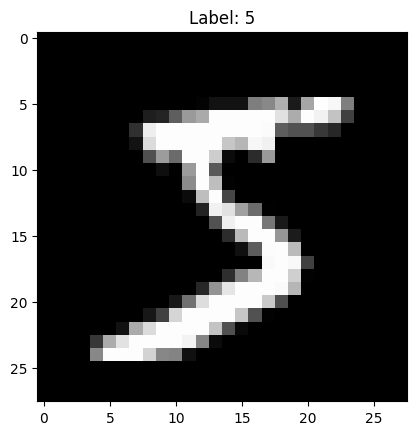

Iteration 0, Cost: 6.938259337324054
Iteration 100, Cost: 3.2304069689898904
Iteration 200, Cost: 3.0764087296027016
Iteration 300, Cost: 2.561685760085087
Iteration 400, Cost: 2.055997292430412
Iteration 500, Cost: 1.7517617700921715
Iteration 600, Cost: 1.53960216650923
Iteration 700, Cost: 1.379059842649504
Iteration 800, Cost: 1.2570337166817838
Iteration 900, Cost: 1.162887514019736


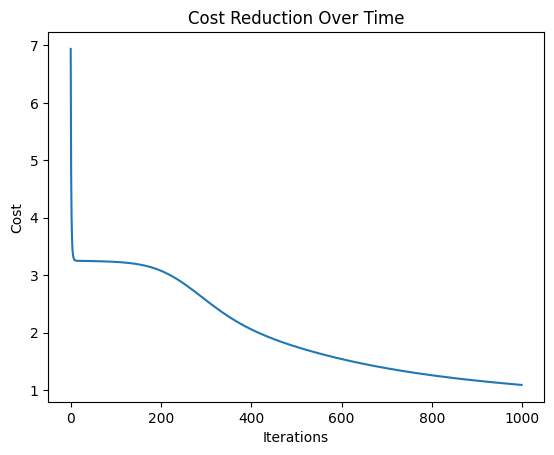

Test Accuracy: 85.91%


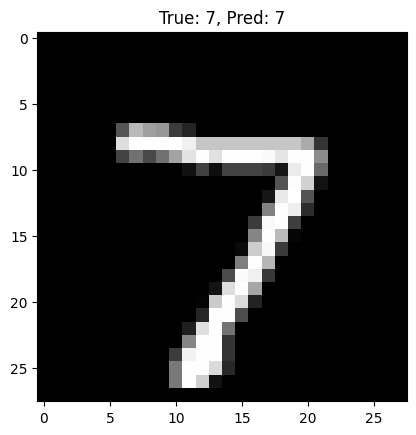

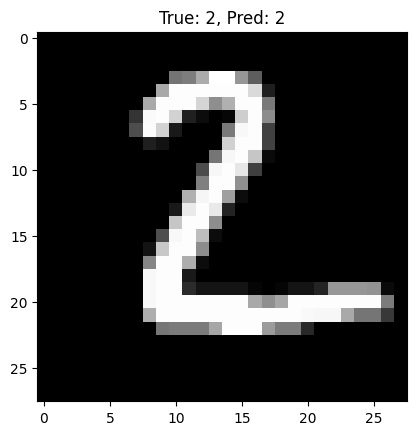

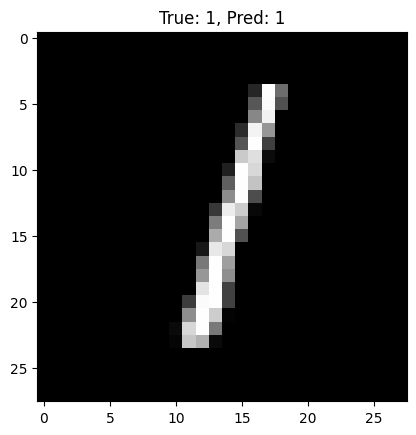

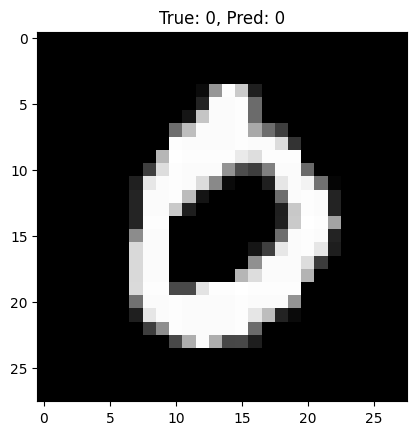

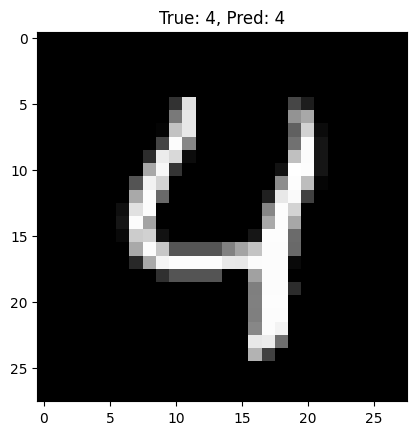

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0     # Flatten and normalize

y_train = to_categorical(y_train, 10)  # One-hot encode the labels (0-9)
y_test = to_categorical(y_test, 10)    # One-hot encode the labels

# Visualize the first image in the dataset
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

# Helper functions for activation and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    return A1, A2

# Cost function (categorical cross-entropy)
def compute_cost(y, A2):
    m = y.shape[0]
    cost = -1/m * np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2))
    return cost

# Backward propagation
def backward_propagation(X, y, A1, A2, W2):
    m = X.shape[0]

    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

# Gradient descent update
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

# Training the neural network
def train(X, y, hidden_size, learning_rate, iterations):
    input_size = X.shape[1]
    output_size = y.shape[1]

    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    costs = []

    for i in range(iterations):
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(y, A2)
        costs.append(cost)

        dW1, db1, dW2, db2 = backward_propagation(X, y, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Time")
    plt.show()

    return W1, b1, W2, b2

# Prediction
def predict(X, W1, b1, W2, b2):
    _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

# Train the model
W1, b1, W2, b2 = train(X_train, y_train, hidden_size=64, learning_rate=0.1, iterations=1000)

# Make predictions on test set
y_pred = predict(X_test, W1, b1, W2, b2)

# Calculate accuracy
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred == y_test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualize a few test images with predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_labels[i]}, Pred: {y_pred[i]}")
    plt.show()